This weeks task is to look at probability analysis, whether negative integers are possible in probability calculations and why we have probability parity in a coin toss. 

# Probability and Binomial Distribution

Probability, a branch of mathematics, tells us the probability, or possibility, of an event occurring. Its value always lies between 0 and 1 where 0 indicates an impossible event and 1 indicates a certain event. The formula for the probability of an event is:

$$ ProbabilityOfAnEvent(Event) = \frac {(NumberOfFavorableOutcomes)} {(TotalNumberOfPossibleOutcomes)}$$

The binomial distribution is a probability distribution used to calculate the likelihood of a yes or no outcome in a survey or experiment replicated numerous times.  This type of forecasting is crucial for estimating all the possible outcomes of data and the frequency with which it might occur. 

$$ P(N) = {\binom{n}{N}}p^{N}(1-p)^{n-N} $$

where p is the probability, n is the number of trials and N is the number of successes.

Python has a useful binomial function in the Scipy library. The following simple code will demonstrate that where success and failure are just as likely, such as a coin toss, the binomial distribution presents as a normal distribution.

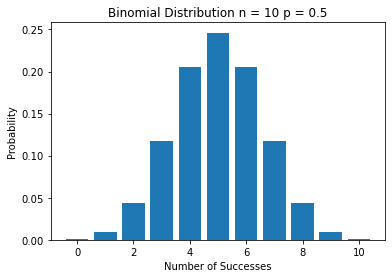

In [1]:
from scipy.stats import binom
import matplotlib.pyplot as plt
# setting the values
# of n and p
n = 10 # number of coin tosses
p = 0.5 # probability of getting heads
# defining list of r values, r being the success rate
r_values = list(range(n + 1))
# list of probability mass function values
dist = [binom.pmf(r, n, p) for r in r_values]
# plotting the graph
plt.bar(r_values, dist)
plt.title("Binomial Distribution n = 10 p = 0.5")
plt.xlabel("Number of Successes")
plt.ylabel("Probability")
plt.show()


Using numpy flip ten coins, tracking each time it gets four heads

In [2]:
import numpy as np

# Keep flipping coins until we get four examples of getting four heads in ten coin tosses.

# Number of examples.
N = 4

# Keep track of number of arrays generated.
total_no = 0

# Keep trying until we get four examples.
while N > 0:
    # Add 1 to total.
    total_no = total_no + 1
    # Toss 10 coins.
    tosses = np.random.binomial(1, 0.5, 10)
    # Check if we got four heads.
    if tosses.sum() == 4:
        # If we got 4 heads, print the list of heads/tails.
        print(tosses)
        # Reduce the number of examples left to find by 1.
        N = N - 1

print(f'Total generated: {total_no}')

[1 1 0 0 1 0 0 1 0 0]
[0 0 1 0 0 0 1 1 0 1]
[0 1 0 0 1 1 0 0 1 0]
[0 0 1 0 1 0 1 1 0 0]
Total generated: 34


If we were to flip a coin ten times such that four out of the ten flips were heads and we wanted to calculate the number of possibilities this presented, the calculation would be:

In [3]:
(10 * 9 * 8 * 7) // (4 * 3 * 2 * 1)

210

This gives us 210 possibilities.  But could the result ever be a negative or a fraction?

## Negative Probabilities

As all of the values used in this particular scenario are positive integers, we will not get a negative or fractional result. In fact, in experimental probability it is assumed that none of the values used can or will be negative so there is no way for the result to be negative.  

Having said that, negative probabilities do theoretically exist.  Quantum mechanics appears to have shouldered Douglas Adams and "42" out of the way as the answer to life, the universe and everything but is slightly less accessible.  One school of thought, posited at differing times by physicists Paul Dirac and later Richard Feynman, argues for the use of negative probabilities to describe certain physical phenomena. Finding workable examples is difficult as negative probabilities deal chiefly with properties that cannot be observed, only hypothesised, but the concept centres around the idea of cancellation.  While the classic interpretation of probabilities deals with events that *have* occurred (or are at least possible/observable), negative probability events can (apparently!) be 'cancelled'.  

Another example in the field of quantum physics is the Wigner distribution in phase space, introduced by Eugene Wigner in 1932 to study quantum corrections, which often leads to negative probabilities.  The Wigner distribution function is routinely used in physics nowadays in phase-space quantization. Its negative features often indicate quantum interference. 

Furthermore, in 2005, Gábor J. Székely, introduced half-coins, which provide simple examples for negative probabilities.  Half-coins have infinitely many sides numbered and the positive even numbers are taken with negative probabilities.


### Note that there are the same number of ways to get 4 tails as there to get 4 heads. Explain why this is

All things be equal, literally, the assumption is that heads and tails are evenly weighted and the probability is 50/50, AND that there is nothing else of note that would affect this probability such as bias or a weighted coin.  A sequence of independent Bernoulli trials with probability 1/2 of success on each trial is metaphorically called a fair coin. One for which the probability is not 1/2 is called a biased or unfair coin. 

In the [code](https://towardsdatascience.com/probability-in-a-weighted-coin-flip-game-using-python-and-numpy-bc1686c49a35) below two players are playing a game where they flip a not necessarily fair coin, starting with Player 1. The first person to flip heads wins. The probability that a coin flipped lands on heads is p.  We are looking to find what the probability is that Player 1 will win. 

In [4]:

def P1_wins(num_games, prob_heads = 0.5): # define the function with two arguments
  player_one_wins = 0 

  for n in range(0, num_games): # counter for the number of games won by Player 1
    num_flips = 0 
    win = 0 # players continue while win = 0
    while win == 0: 
      turn = np.random.uniform(0,1) 
      num_flips += 1 
      if turn <= prob_heads: 
        if num_flips % 2 != 0: #counting turns taken
          player_one_wins += 1 
        win += 1 
  return float(player_one_wins)/float(num_games) # games won by player 1 divided by the total number of games played
P1_wins (500000)

0.667646

When we run the function for 50,000 games we see that Player 1 wins approximately 66% of the time.  This is because they have the advantage of going first and when they flip a head (or for the purposes of our code, a 1) they win and the game is over/re-starts.  Player 2 has lost before they even touch the coin!  To make this scenario more equitable we would have to adjust the probability from 0.5 to <0.1 for our output to come close to a 50/50 chance of success for both player 1 and 2. 

### References:
Background reading https://towardsdatascience.com/how-to-code-a-fair-coin-flip-in-python-d54312f33da9

Useful explanatory with formulas https://www.geeksforgeeks.org/coin-toss-probability-formula/#:~:text=For%20each%20coin%20toss%2C%20there,of%20possible%20outcomes%20are%20obtained.&text=So%2C%20there%20is%2012.5%25%20chances,when%203%20coins%20are%20tossed

Binomial Distribution worked example with plot https://www.geeksforgeeks.org/python-binomial-distribution/

Negative probabilities, Durac, Feynman and Quantum Mechanics https://stats.stackexchange.com/questions/333610/negative-probabilities-layman-explanations

Negative probability, Wikipedia, Gabor J. Szekely https://en.wikipedia.org/wiki/Negative_probability

Looking at the idea of a loaded or biased coin https://en.wikipedia.org/wiki/Fair_coin

Some coding for a weighted coin toss https://towardsdatascience.com/probability-in-a-weighted-coin-flip-game-using-python-and-numpy-bc1686c49a35